In [1]:
import sys
sys.path.append("../../")

import torch
from autoencoder import get_autoencoder
from datasets import get_imagenet_dataloader
import matplotlib.pyplot as plt
import numpy as np
import torchvision

## ImageNet Dataloader

In [2]:
data_dir = "../../data"

batch_size = 1
dataloader = get_imagenet_dataloader(batch_size=batch_size, seed=1, data_dir=data_dir)

x, y = next(iter(dataloader))
assert x.shape == torch.Size([batch_size, 3, 256, 256])

In [3]:
def imshow(img, title=None):
    """
    Imshow for Tensor.
    """
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()

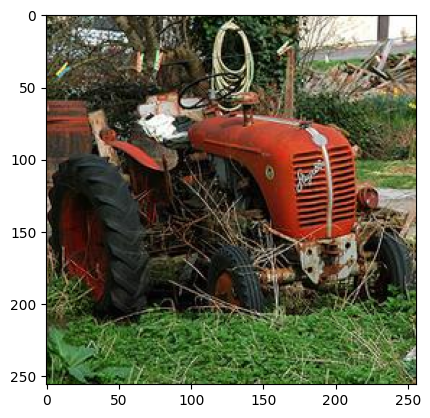

tensor([913])


In [4]:
imshow(torchvision.utils.make_grid(x[0]))
print(y)

## Load and Test FrozenAutoencoderKL

In [6]:
ddconfig = {
    "double_z": True,
    "z_channels": 4,
    "resolution": 256,
    "in_channels": 3,
    "out_ch": 3,
    "ch": 128,
    "ch_mult": [ 1,2,4,4 ],  # num_down = len(ch_mult)-1
    "num_res_blocks": 2,
    "attn_resolutions": [ ],
    "dropout": 0.0
}

pretrained_path = "../../checkpoints/autoencoder/autoencoder_kl.pth"

In [7]:
autoencoder = get_autoencoder(pretrained_path = "../../checkpoints/autoencoder/autoencoder_kl.pth")

Create autoencoder with scale_factor=0.18215
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [15]:
x = x.to(device)
y = y.to(device)
autoencoder = autoencoder.to(device)

In [16]:
encoded_x = autoencoder.encode(x)
decoded_x = autoencoder.decode(encoded_x)
assert decoded_x.shape == torch.Size([batch_size, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15778416..1.0280781].


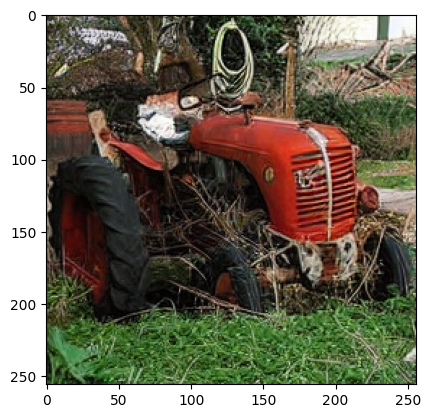

In [17]:
imshow(decoded_x[0].cpu())